# K-Nearest Neighbours ( KNN )
The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle classification and regression problems.

It is widely disposable in real-life scenarios since it is non-parametric, meaning it does not make any underlying assumptions about the distribution of data.

The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. 
The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data

# Euclidean Distance
This is nothing but the cartesian distance between the two points which are in the plane/hyperplane. Euclidean distance can also be visualized as the length of the straight line that joins the two points which are into consideration. This metric helps us calculate the net displacement done between the two states of an object
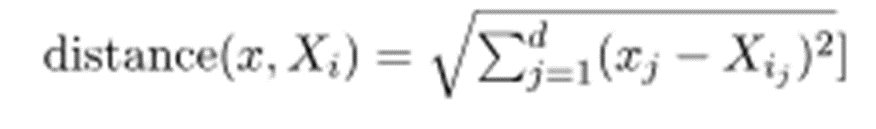

# Manhattan Distance
Manhattan Distance metric is generally used when we are interested in the total distance traveled by the object instead of the displacement.
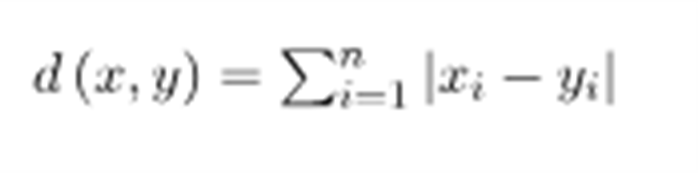
# Minkowski Distance
We can say that the Euclidean, as well as the Manhattan distance, are special cases of the Minkowski distance
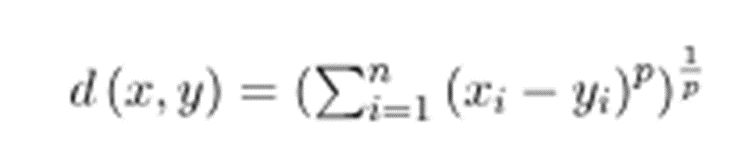

From the formula above we can say that when p = 2 then it is the same as the formula for the Euclidean distance and when p = 1 then we obtain the formula for the Manhattan distance




# How to choose the value of k for KNN Algorithm?

The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm.

The value of k in the k-nearest neighbors (k-NN) algorithm should be chosen based on the input data.

 If the input data has more outliers or noise, a higher value of k would be better. On the other hand, if the input data has less noise, a lower value of k would be better.

It is recommended to choose an odd value for k to avoid ties in classification.

Cross-validation methods can help in selecting the best k value for the given dataset.


# Workings of KNN algorithm

Thе K-Nearest Neighbors (KNN) algorithm operates on the principle of similarity, where it predicts the label or value of a new data point by considering the labels or values of its K nearest neighbors in the training dataset.
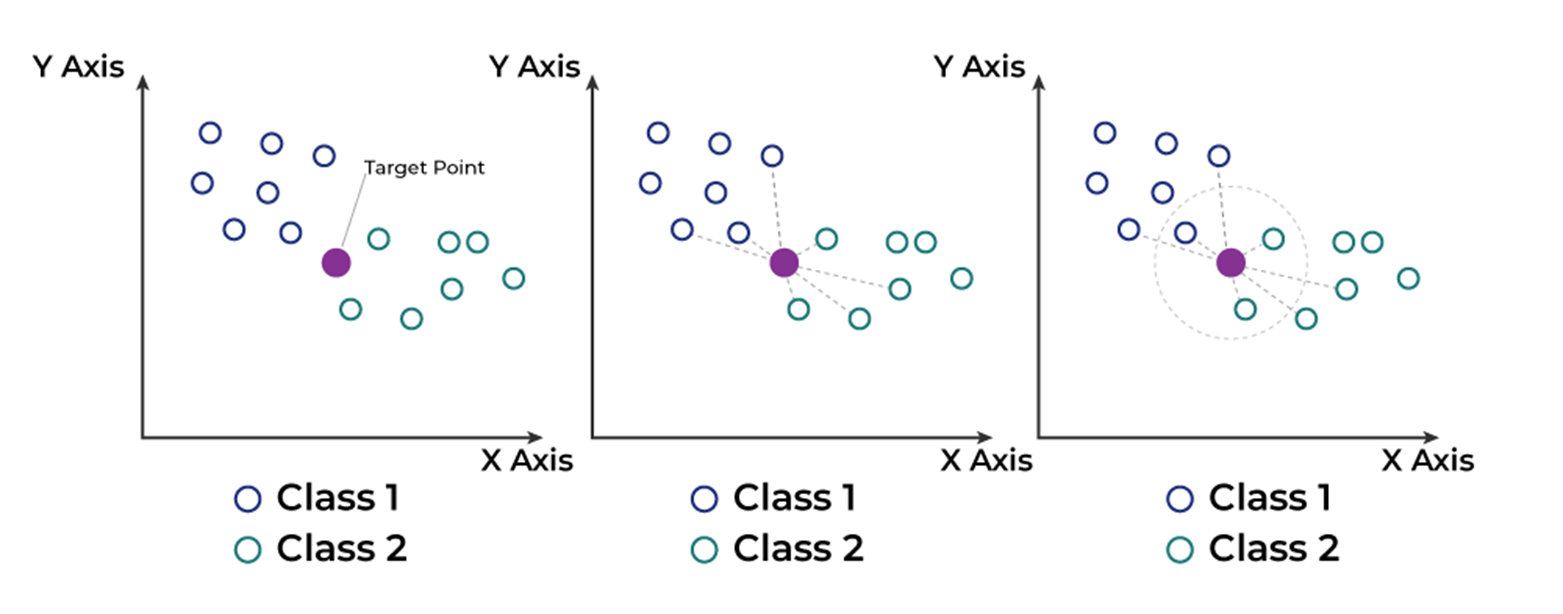


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [5]:
# load the dataset
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:

X=iris.drop("species", axis =1)
y=iris["species"]

In [22]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_predict=knn.predict(X_test)

In [17]:
knn.predict([[10,10,2,.5]])

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [36]:
# evaluate the model
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict, average='weighted'))
print(recall_score(y_test, y_predict, average='weighted'))



1.0
1.0
1.0


In [29]:
print(f1_score(y_test, y_predict, average='weighted'))


1.0


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

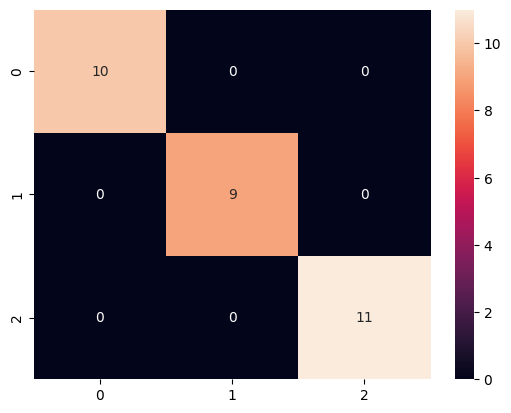

In [37]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# KNN Regression:

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [70]:
tip=sns.load_dataset("tips")
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [71]:
tip["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [72]:
# Convert strings into numeric data using label encoding
le=LabelEncoder()
for columns in tip.columns:
    if tip[columns].dtypes=="object" or tip[columns].dtypes=="category":
        tip[columns]=le.fit_transform(tip[columns])

In [73]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [74]:
tip["day"].value_counts()

day
1    87
2    76
3    62
0    19
Name: count, dtype: int64

In [75]:
# Split the data in input and output
X=tip.drop("tip", axis=1)
y=tip["tip"]

In [76]:
# Split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
knn=KNeighborsRegressor(n_neighbors=5)

In [78]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [79]:
knn.predict(X_test)

array([2.884, 1.922, 3.978, 3.516, 1.898, 3.124, 4.094, 1.824, 2.218,
       2.888, 3.026, 2.07 , 1.772, 2.322, 1.966, 3.05 , 3.188, 3.608,
       2.562, 4.262, 3.33 , 2.78 , 2.358, 1.678, 3.476, 1.786, 1.678,
       2.992, 2.538, 6.346, 4.25 , 2.678, 2.928, 2.994, 2.364, 3.546,
       1.74 , 4.262, 1.896, 3.962, 1.988, 2.244, 3.614, 2.228, 1.758,
       2.214, 2.448, 2.946, 2.276])

In [80]:
tip["sex"].nunique()

2

In [81]:
tip.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [82]:
knn.predict([[20,1,0,5,0,3]])

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.866])

In [84]:
# Evaluate the model
print(mean_squared_error(y_test, knn.predict(X_test)))
print(r2_score(y_test, knn.predict(X_test)))
print(mean_absolute_error(y_test, knn.predict(X_test)))

0.8382265306122448
0.3294034029001649
0.7262448979591837


# Decision tree
A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks.

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.

It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

During training, the Decision Tree algorithm selects the best attribute to split the data based on a metric such as entropy or Gini impurity, which measures the level of impurity or randomness in the subsets. The goal is to find the attribute that maximizes the information gain or the reduction in impurity after the split.

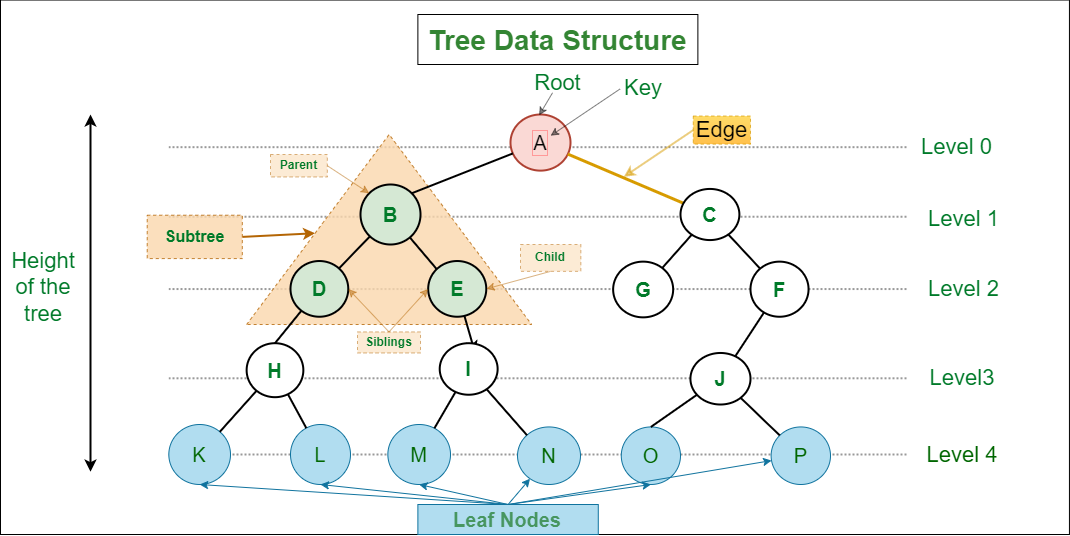


Some of the common Terminologies used in Decision Trees are as follows:

**Root Node:** It is the topmost node in the tree,  which represents the complete dataset. It is the starting point of the decision-making process.\
**Decision/Internal Node**: A node that symbolizes a choice regarding an input feature. Branching off of internal nodes connects them to leaf nodes or other internal nodes.\
**Leaf/Terminal Node:** A node without any child nodes that indicates a class label or a numerical value.\
**Splitting:** The process of splitting a node into two or more sub-nodes using a split criterion and a selected feature.\
**Branch/Sub-Tree:** A subsection of the decision tree starts at an internal node and ends at the leaf nodes\
**Parent Node:** The node that divides into one or more child nodes.\
**Child Node:** The nodes that emerge when a parent node is split.\
**Impurity:** A measurement of the target variable’s homogeneity in a subset of data. It refers to the degree of randomness or uncertainty in a set of examples. The Gini index and entropy are two commonly used impurity measurements in decision trees for classifications task\ 
**Variance:** Variance measures how much the predicted and the target variables vary in different samples of a dataset. It is used for regression problems in decision trees. Mean squared error, Mean Absolute Error, friedman_mse, or Half Poisson deviance are used to measure the variance for the regression tasks in the decision tree.\
**Information Gain:** Information gain is a measure of the reduction in impurity achieved by splitting a dataset on a particular feature in a decision tree. The splitting criterion is determined by the feature that offers the greatest information gain, It is used to determine the most informative feature to split on at each node of the tree, with the goal of creating pure subsets\
**Entropy:** Entropy is a measure of the randomness or uncertainty in a dataset. It is used to calculate the homogeneity of a sample. A decision tree algorithm uses entropy to calculate the information gain, which is used to determine the best feature to split the dataset.

**Pruning:** The process of removing branches from the tree that do not provide any additional information or lead to overfitting.\
**Gini Impurity or index:**
**Gini Impurity** is a score that evaluates how accurate a split is among the classified groups. The Gini Impurity evaluates a score in the range between 0 and 1, where 0 is when all observations belong to one class, and 1 is a random distribution of the elements within classes. In this case, we want to have a Gini index score as low as possible. Gini Index is the evaluation metric we shall use to evaluate our Decision Tree Model.
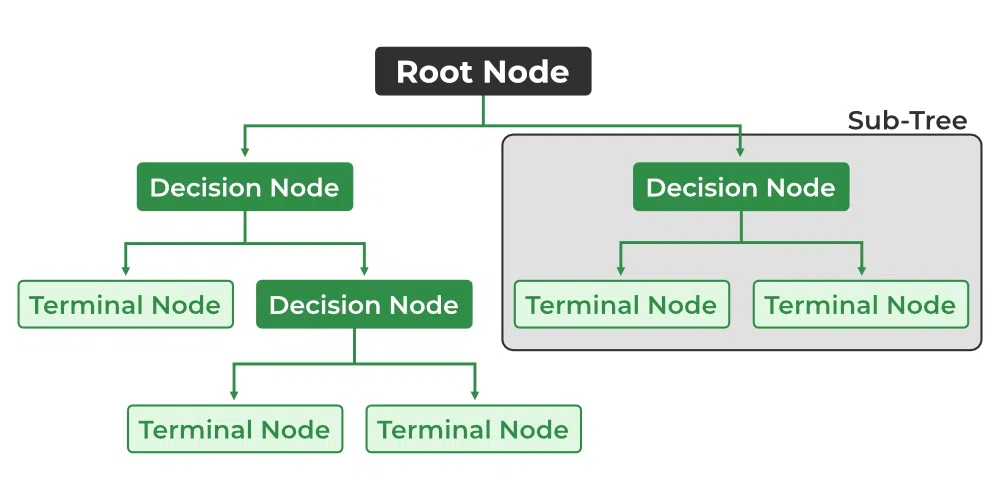



In [1]:
import math

In [2]:
# Example Dataset
# Let's say we have a dataset with two classes, A and B
# Suppose in a dataset of 10 elements, 4 are of class A and 6 are of class B

# Number of elements in each class
n_A = 4
n_B = 6
total = n_A + n_B

In [3]:
# let's calculate the proportions
p_A = n_A / total
p_B = n_B / total

# print the proportions
print("Proportion of A: ", p_A)
print("Proportion of B: ", p_B)

Proportion of A:  0.4
Proportion of B:  0.6


In [4]:
# Entropy Calculate
# Entropy is a measure of uncertainty
entropy = -p_A * math.log2(p_A) - p_B * math.log2(p_B)
print("Entropy: ", entropy)

Entropy:  0.9709505944546686


In [5]:
# gini impurity
# Gini impurity is a measure of misclassification
gini = 1- p_A**2 - p_B**2
print("Gini Impurity: ", gini)

Gini Impurity:  0.48


In [6]:
# Information Gain
# Assuming a split on some feature divides the dataset into two subsets
# Subset 1: 2 elements of A, 3 of B
# Subset 2: 2 elements of A, 3 of B
# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3

p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

# Calculating information gain
info_gain = entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2)
print("Information Gain: ", info_gain)

Information Gain:  0.0


Based on our example dataset with two classes (A and B), we have calculated the following values:

Entropy: The calculated entropy of the dataset is approximately 0.971. This value indicates a moderate level of disorder in the dataset, considering that it's not very close to 0 (which would mean no disorder) and not at its maximum (which would mean complete disorder for a binary classification).

Gini Impurity: The Gini impurity for the dataset is 0.48. This value, being less than 0.5, suggests some level of purity in the dataset but still indicates a mix of classes A and B.

Information Gain: The information gain from the chosen split is 0.0. This result implies that the split did not reduce the entropy or disorder of the dataset. In other words, the split did not add any additional information that could help distinguish between classes A and B more effectively than before.

These metrics provide insight into the nature of the dataset and the effectiveness of potential splits when constructing a decision tree. In practical applications, you would use these calculations to choose the best feature and split at each node in the tree to maximize the purity of the subsets created.

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [10]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.drop("deck", axis=1, inplace=True)

In [16]:
imputer=SimpleImputer(strategy="most_frequent")
df[["age","fare","embark_town", "embarked"]]=imputer.fit_transform(df[["age","fare","embark_town", "embarked"]])

In [17]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    object  
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    object  
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), int64(4), object(7)
memory usage: 79.4+ KB


In [20]:
le=LabelEncoder()

In [24]:

for col in df.columns:
    if df[col].dtypes=="object" or df[col].dtypes=="category":
        df[col]=le.fit_transform(df[col])